# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [125]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  6829k      0  0:00:13  0:00:13 --:--:-- 4970k
total 48
-rw-rw-r--@    1 magloirendabagera  staff      0 29 Jun 09:11 README.md
-rw-r--r--@    1 magloirendabagera  staff  20937 30 Jun 09:01 image_denoising.ipynb
drwx------  1087 magloirendabagera  staff  34784  9 Jun 15:06 paintings
drwxrwxr-x@    3 magloirendabagera  staff     96 29 Jun 09:11 tests


In [3]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

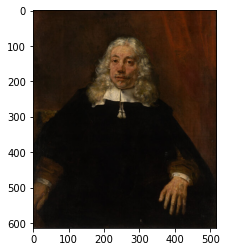

In [13]:
image = mpimg.imread(dataset_paths[53])
plt.imshow(image)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [19]:
# YOUR CODE HERE
img_shape = image.shape
img_dim = image.ndim

In [21]:
img_shape

(614, 517, 3)

In [22]:
img_dim

3

❓ **What was in the image above?**

In [23]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [24]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [26]:
len(dataset_paths)

1085

In [31]:
# YOUR CODE HERE

#function to store image in dataset_images paths
def get_images():
    dataset_images= []
    for i in range(len(dataset_paths)):
        dataset_images.append(mpimg.imread(dataset_paths[i]))
    return dataset_images

In [34]:
dataset_images = get_images()

In [37]:
type(dataset_images[0])

numpy.ndarray

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [38]:
dataset_images[0].shape

(358, 434, 3)

In [41]:
# YOUR CODE HERE
#function to check number of dimension of each images

def get_n_dim():
    shape = []
    for i in range(len(dataset_images)):
        shape.append(dataset_images[i].shape)
    return shape

In [43]:
shape = get_n_dim()
shape

[(358, 434, 3),
 (627, 604, 3),
 (484, 307, 3),
 (484, 352, 3),
 (461, 614, 3),
 (480, 626, 3),
 (614, 467, 3),
 (401, 479, 3),
 (600, 450, 3),
 (425, 618, 3),
 (639, 381, 3),
 (614, 463, 3),
 (362, 480, 3),
 (322, 384, 3),
 (474, 614, 3),
 (484, 368, 3),
 (556, 614, 3),
 (427, 614, 3),
 (489, 614, 3),
 (419, 614, 3),
 (614, 449, 3),
 (653, 261, 3),
 (480, 317, 3),
 (614, 469, 3),
 (234, 312, 3),
 (270, 181, 3),
 (360, 273, 3),
 (424, 300),
 (660, 520, 3),
 (1229, 911),
 (787, 510, 3),
 (299, 218, 3),
 (573, 561, 3),
 (971, 1214, 3),
 (526, 343, 3),
 (1229, 833),
 (586, 789, 3),
 (360, 418, 3),
 (742, 597, 3),
 (614, 292, 3),
 (466, 394, 3),
 (482, 480, 3),
 (461, 334, 3),
 (614, 380, 3),
 (1229, 757, 3),
 (600, 398, 3),
 (670, 900, 3),
 (461, 326, 3),
 (253, 173, 3),
 (480, 346, 3),
 (614, 457, 3),
 (614, 422, 3),
 (615, 427, 3),
 (614, 517, 3),
 (361, 480, 3),
 (347, 540, 3),
 (614, 489, 3),
 (515, 768, 3),
 (365, 480, 3),
 (600, 535, 3),
 (1010, 1536),
 (629, 630, 3),
 (842, 1229),


> ANSWER

We can see that not all the image have the same number of dimension this can be explain because some of them don't have color  and are just Black and White

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [47]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])


100%|██████████| 1085/1085 [00:01<00:00, 776.91it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [ ]:
resized_images = tf.image.resize(b, (120, 100))

In [66]:
# YOUR CODE HERE

# function to resized image
def resized():
    dataset_resized = []
    for i in range(len(dataset_images)):
        dataset_resized.append(tf.image.resize(dataset_images[i],(120,100)).numpy())
    return dataset_resized

In [71]:
len(dataset_resized)

1085

In [68]:
dataset_resized = resized()

[array([[[ 90.68917 ,  84.019165,  92.67917 ],
         [105.899086,  95.899086, 103.899086],
         [ 94.690414,  83.34042 ,  88.64041 ],
         ...,
         [113.0886  ,  80.0886  ,  89.07777 ],
         [116.95504 ,  84.95504 ,  87.975   ],
         [108.37742 ,  76.0474  ,  79.68754 ]],
 
        [[100.6815  ,  94.011505, 102.6715  ],
         [ 95.014   ,  85.014   ,  93.014   ],
         [103.6075  ,  92.2575  ,  97.557495],
         ...,
         [108.10137 ,  75.10137 ,  84.10137 ],
         [110.787186,  78.787186,  83.787186],
         [104.1102  ,  71.78018 ,  76.760284]],
 
        [[ 89.878334,  83.208336,  91.86833 ],
         [ 91.432915,  81.432915,  89.432915],
         [104.012505,  92.6625  ,  97.9625  ],
         ...,
         [103.09155 ,  70.09155 ,  79.76234 ],
         [101.14005 ,  68.14005 ,  75.15918 ],
         [ 97.67303 ,  64.384674,  73.59771 ]],
 
        ...,
 
        [[ 66.702095,  67.36209 ,  78.3521  ],
         [100.03    ,  91.020004,  83.99 

In [94]:
dataset_resized = np.array([np.array(dataset_resized[fname]) for fname in range(len(dataset_resized))])

In [95]:
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [96]:
# YOUR CODE HERE

#function to scaled data

def scaled_data():
    dataset_scaled = []
    for i in range(len(dataset_resized)):
        dataset_scaled.append(dataset_resized[i]/255)
    return dataset_scaled

In [99]:
dataset_scaled = np.array([np.array(dataset_resized[fname]/255) for fname in range(len(dataset_resized))])

In [101]:
dataset_scaled.shape

(1085, 120, 100, 3)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [102]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

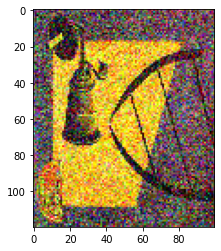

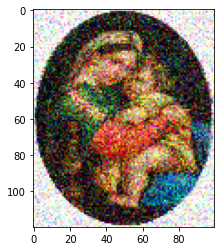

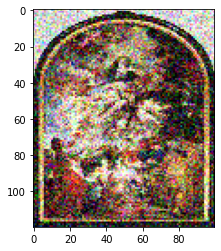

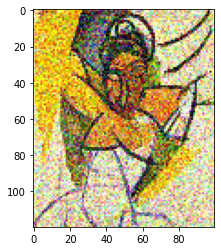

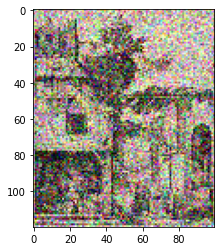

In [130]:
#your CODE HERE

for i in [0,20,30,40,100]:
    plt.imshow(dataset_noisy[i])
    plt.show()

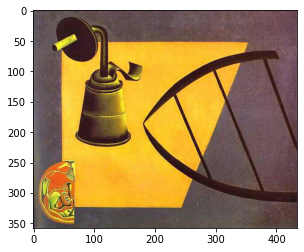

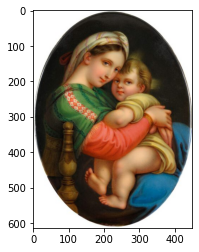

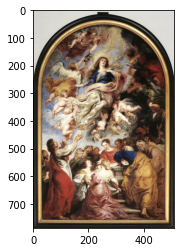

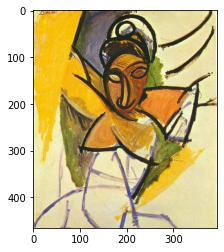

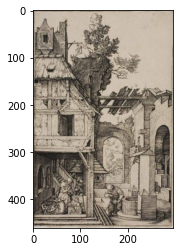

In [131]:
# YOUR CODE HERE
for i in [0,20,30,40,100]:
    plt.imshow(dataset_images[i])
    plt.show()

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [137]:
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [138]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [139]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0  9372k      0  0:00:32  0:00:32 --:--:-- 6635kM      0  0:00:26  0:00:20  0:00:06 4817k:00:32 --:--:-- 6348k


### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [140]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [141]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [149]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
latent_dimensions = 6000

# def build_encoder(latent_dimension):
#     '''returns an encoder model, of output_shape equals to latent_dimension'''
encoder = Sequential()

encoder.add(Conv2D(8, (2,2), input_shape=(120,100,3), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(16, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(32, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))     

encoder.add(Flatten())
encoder.add(Dense(latent_dimensions,activation='tanh'))
    
encoder.summary()


# encoder = None

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 119, 99, 8)        104       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 58, 48, 16)        528       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 29, 24, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 23, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 11, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4928)             

👉 **Test your encoder below**

In [150]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 6000)              29576712  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 29,583,387
Trainable params: 29,583,387
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [151]:
# YOUR CODE HERE
score_baseline = 0

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [166]:
# YOUR CODE HERE
from tensorflow.keras import callbacks
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

def compile_autoencoder(autoencoder):
    # $CHALLENGIFY_BEGIN
    autoencoder.compile(loss='mse',
                  optimizer='adam',
                  metrics= ['mae'])
    return autoencoder

In [167]:
model = compile_autoencoder(autoencoder)
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.2,
          callbacks=[es],
          verbose=1)

Epoch 1/100
22/22 [==============================] - 10s 406ms/step - loss: 0.0732 - mae: 0.2326 - val_loss: 0.0735 - val_mae: 0.2308
Epoch 2/100
22/22 [==============================] - 9s 399ms/step - loss: 0.0727 - mae: 0.2305 - val_loss: 0.0736 - val_mae: 0.2337
Epoch 3/100
22/22 [==============================] - 9s 404ms/step - loss: 0.0727 - mae: 0.2318 - val_loss: 0.0736 - val_mae: 0.2307
Epoch 4/100
22/22 [==============================] - 9s 403ms/step - loss: 0.0724 - mae: 0.2305 - val_loss: 0.0734 - val_mae: 0.2330
Epoch 5/100
22/22 [==============================] - 9s 409ms/step - loss: 0.0723 - mae: 0.2306 - val_loss: 0.0739 - val_mae: 0.2309
Epoch 6/100
22/22 [==============================] - 9s 414ms/step - loss: 0.0723 - mae: 0.2304 - val_loss: 0.0732 - val_mae: 0.2314
Epoch 7/100
22/22 [==============================] - 9s 410ms/step - loss: 0.0720 - mae: 0.2303 - val_loss: 0.0734 - val_mae: 0.2325
Epoch 8/100
22/22 [==============================] - 9s 431ms/step -

❓ **Plot your training and validation loss at each epoch using the cell below**

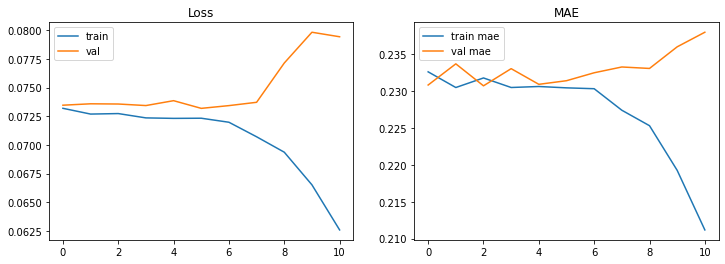

In [168]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(history.history['mae'], label='train mae'  + exp_name)
    ax2.plot(history.history['val_mae'], label='val mae'  + exp_name)
    ax2.set_title('MAE')
    ax2.legend()
    return (ax1, ax2)

plot_history(history)



# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [169]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(X_test, verbose=1)

7/7 [==============================] - 1s 79ms/step


In [170]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 78ms/step - loss: 0.0747 - mae: 0.2353


[0.0747314915060997, 0.23528315126895905]

In [171]:
score_test = model.evaluate(X_test, y_test, verbose=0)[1]
score_test

0.23528315126895905

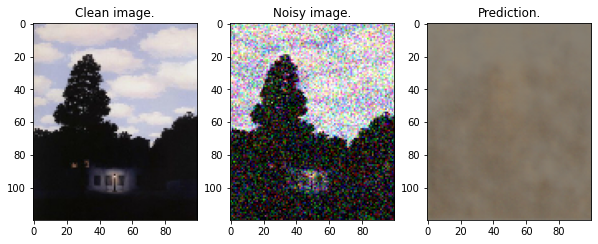

In [172]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [173]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()